<a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch-2E/blob/main/Chapter02/Building_a_neural_network_using_PyTorch_on_a_toy_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [2]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [4]:
import torch.nn as nn

In [ ]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
        
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [7]:
print(nn.Linear(2, 8))

Linear(in_features=2, out_features=8, bias=True)


In [27]:
mynet = MyNeuralNet().to(device)

In [28]:
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[-0.1089,  0.4127],
        [-0.1827,  0.6983],
        [ 0.5313,  0.4286],
        [-0.1008,  0.5866],
        [-0.4695, -0.2580],
        [ 0.1172,  0.3709],
        [ 0.6760,  0.6423],
        [ 0.2402,  0.6407]], device='cuda:0', requires_grad=True)

In [29]:
for param in mynet.parameters():
    print(param)

Parameter containing:
tensor([[-0.1089,  0.4127],
        [-0.1827,  0.6983],
        [ 0.5313,  0.4286],
        [-0.1008,  0.5866],
        [-0.4695, -0.2580],
        [ 0.1172,  0.3709],
        [ 0.6760,  0.6423],
        [ 0.2402,  0.6407]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 0.5441,  0.4775, -0.6587,  0.4692,  0.5385, -0.1611, -0.2941, -0.2786],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.2348, -0.0188,  0.2994, -0.1206,  0.3146,  0.2129, -0.0721, -0.2042]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0.2968], device='cuda:0', requires_grad=True)


In [30]:
loss_func = nn.MSELoss()

In [31]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(86.1315, device='cuda:0', grad_fn=<MseLossBackward0>)


In [32]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.002)

In [33]:
loss_history = []
for _ in range(200):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

Text(0, 0.5, 'loss value')

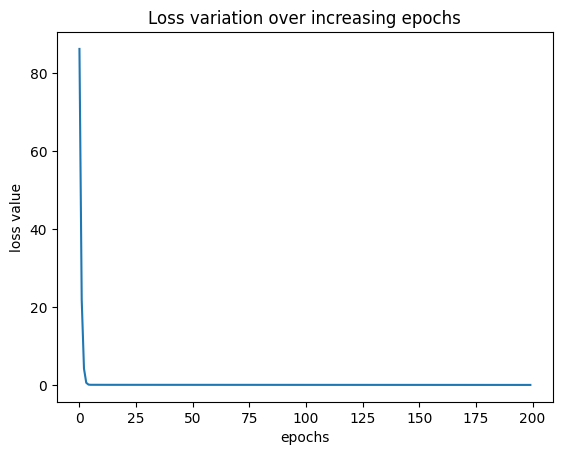

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')